<h4><center>Problema a identificar: ¿Existen sensores de medición cuyo comportamiento sea anómalo en alguna de las 10 estaciones meteorológicas de la ciudad de Monterrey y su área metropolitana para el año 2015? </center></h4>

<h4><center>Hipótesis: No hay sensores anómalos. </center></h4>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st

In [2]:
#Habilitamos la visualización de hasta 170 columnas en Pandas.
pd.options.display.max_columns = 170

<h4><center>Este DF cuenta con datos climatológicos de 10 distintas estaciones  
meteorológicas ubicadas en Monterrey y su zona metropolitana.</center></h4>

In [3]:
df = pd.read_excel("Todo 2015_1.xlsx", header = [0,1]) #Multiindexing
df_raw = df.copy()
df.head(25)

CE-MET               SURESTE                                      \
   Date - Time Date - Time.1      CO   NO  NO2  NOX   O3     PM10  PM2.5   
0          NaT           NaN     ppm  ppb  ppb  ppb  ppb    ug/m3  ug/m3   
1   2015-01-01      00:00:00    1.79  NaN  NaN  NaN    6       37    NaN   
2   2015-01-01      01:00:00    1.74  NaN  NaN  NaN    5       70    NaN   
3   2015-01-01      02:00:00     1.7  NaN  NaN  NaN    5       47    NaN   
4   2015-01-01      03:00:00    1.72  NaN  NaN  NaN    4  39.9059    NaN   
5   2015-01-01      04:00:00    1.68  NaN  NaN  NaN    4  36.8624    NaN   
6   2015-01-01      05:00:00    1.66  NaN  NaN  NaN    4  36.2537    NaN   
7   2015-01-01      06:00:00    1.59  NaN  NaN  NaN    5  39.2972    NaN   
8   2015-01-01      07:00:00    1.65  NaN  NaN  NaN    4  33.8189    NaN   
9   2015-01-01      08:00:00    1.62  NaN  NaN  NaN    3  34.4276    NaN   
10  2015-01-01      09:00:00    1.59  NaN  NaN  NaN    4  35.0363    NaN   
11  2015-01-01      10:00:00    1.67  NaN  NaN  NaN    5  34.4276    NaN   
12  2015-01-01      11:00:00     1.7  NaN  NaN  NaN    6  35.0363    NaN   
13  2015-01-01      12:00:00    1.82  NaN  NaN  NaN    6  36.8624    NaN   
14  2015-01-01      13:00:00    1.85  NaN  NaN  NaN    6  43.5581    NaN   
15  2015-01-01      14:00:00     1.9  NaN  NaN  NaN    6  50.8625    NaN   
16  2015-01-01      15:00:00    1.95  NaN  NaN  NaN    6  53.2973    NaN   
17  2015-01-01      16:00:00    1.99  NaN  NaN  NaN    5   59.993    NaN   
18  2015-01-01      17:00:00    1.96  NaN  NaN  NaN    3  60.6017    NaN   
19  2015-01-01      18:00:00    2.02  NaN  NaN  NaN    3  62.4278    NaN   
20  2015-01-01      19:00:00    1.92  NaN  NaN  NaN    3  64.8626    NaN   
21  2015-01-01      20:00:00    1.77  NaN  NaN  NaN    4  46.6016    NaN   
22  2015-01-01      21:00:00    1.66  NaN  NaN  NaN    5  44.7755    NaN   
23  2015-01-01      22:00:00    1.68  NaN  NaN  NaN    4  42.3407    NaN   
24  2015-01-01      23:00:00     1.6  NaN  NaN  NaN    6   35.645    NaN   

                                                       NORESTE              \
     PRS  RAINF  RH  SO2     SR  TOUT   WSR  WDV WDV.1      CO    NO   NO2   
0   mmhg  mm/hr   %  ppb  KW/m2  degC  KMPH  DEG   NaN     ppm   ppb   ppb   
1    NaN      0  97  4.5      0  4.52   6.4  180   NaN     2.5   8.8  13.1   
2    NaN      0  97  3.9      0   4.3   5.1  181   NaN    2.51  10.2  12.9   
3    NaN      0  97  3.2      0  4.23   4.1  190   NaN    2.41   9.2  11.6   
4    NaN      0  97  2.9      0  4.14   3.5  104   NaN    2.39   8.1  11.8   
5    NaN      0  97  2.9      0  4.11   2.9  103   NaN    2.37   6.7  11.1   
6    NaN      0  97  2.9      0  4.24   3.2  200   NaN    2.26   5.3   8.9   
7    NaN      0  97  2.8      0  4.25   3.1  242   NaN    2.23   4.7   8.4   
8    NaN      0  97  2.7      0  4.25   2.5  164   NaN    2.25   5.8   9.8   
9    NaN      0  97  2.7  0.013  4.39   1.8  142   NaN    2.25   7.2  10.2   
10   NaN      0  97  2.7  0.041  4.66   3.1   77   NaN    2.21   5.8   8.2   
11   NaN      0  97  2.6  0.093  5.09   3.6   61   NaN    2.28   7.6   8.3   
12   NaN      0  97  2.8  0.164  5.96   3.3   90   NaN    2.33   9.8   8.9   
13   NaN      0  97  2.9   0.16  6.67     2   95   NaN    2.38    10  10.1   
14   NaN      0  95  3.1  0.153  7.01     4   93   NaN    2.51  11.5  12.3   
15   NaN      0  93  3.3  0.115  7.32   4.4   80   NaN    2.55    12  13.5   
16   NaN      0  93  3.2  0.099  7.57   4.4   74   NaN    2.45  10.5  12.8   
17   NaN      0  94  3.2   0.05  7.37   4.6   55   NaN    2.59  11.4    14   
18   NaN      0  96  3.3  0.012  7.07   4.8   60   NaN    2.73  16.1  17.7   
19   NaN      0  97  3.5      0  6.71   4.4   74   NaN    2.76  14.8  18.6   
20   NaN      0  97  3.3      0  6.33   5.6   79   NaN    2.81  21.2    18   
21   NaN      0  97  3.2      0  5.92   6.3   75   NaN     2.6  18.2  11.6   
22   NaN      0  97    3      0  5.46   8.1   76   NaN    2.43  13.1  11.3   
23   

#### Limpieza

In [4]:
#Para conservar las unidades de medición de los sensores.
unidades = df.iloc[0,14:30]
#unidades

In [5]:
df.rename(columns={"Date - Time":"DATE","Date - Time.1":"HOURS"}, inplace=True)

In [6]:
df.drop(0, inplace=True) #Eliminar fila de las unidades.

In [7]:
#los hacemos numéricos
df.iloc[:,2:-1] = df.iloc[:,2:-1].astype(float)

In [8]:
#Convertir y unir la fecha en una sola columna
df.iloc[:,0] = df["CE-MET"]["DATE"].astype(str) + df["CE-MET"]["HOURS"].astype(str)
df.iloc[:,0] = df["CE-MET"]["DATE"].str.replace("00:00:00","",1)
df.iloc[:,0] = pd.to_datetime(df.iloc[:,0], errors="raise", utc=True,infer_datetime_format=True, format="%Y-%m-%dT%H:%M:%S")
df.drop("HOURS", axis=1, level=1, inplace=True)

In [9]:
df.head()

CE-MET SURESTE                                            \
                       DATE      CO  NO NO2 NOX   O3     PM10 PM2.5 PRS RAINF   
1 2015-01-01 00:00:00+00:00    1.79 NaN NaN NaN  6.0  37.0000   NaN NaN   0.0   
2 2015-01-01 01:00:00+00:00    1.74 NaN NaN NaN  5.0  70.0000   NaN NaN   0.0   
3 2015-01-01 02:00:00+00:00    1.70 NaN NaN NaN  5.0  47.0000   NaN NaN   0.0   
4 2015-01-01 03:00:00+00:00    1.72 NaN NaN NaN  4.0  39.9059   NaN NaN   0.0   
5 2015-01-01 04:00:00+00:00    1.68 NaN NaN NaN  4.0  36.8624   NaN NaN   0.0   

                                          NORESTE                          \
     RH  SO2   SR  TOUT  WSR    WDV WDV.1      CO    NO   NO2   NOX    O3   
1  97.0  4.5  0.0  4.52  6.4  180.0   NaN    2.50   8.8  13.1  21.9  17.0   
2  97.0  3.9  0.0  4.30  5.1  181.0   NaN    2.51  10.2  12.9  23.1  10.0   
3  97.0  3.2  0.0  4.23  4.1  190.0   NaN    2.41   9.2  11.6  20.8   7.0   
4  97.0  2.9  0.0  4.14  3.5  104.0   NaN    2.39   8.1  11.8  19.9   7.0   
5  97.0  2.9  0.0  4.11  2.9  103.0   NaN    2.37   6.7  11.1  17.8   7.0   

                                                                    CENTRO  \
    PM10 PM2.5    PRS RAINF    RH  SO2   SR  TOUT  WSR    WDV WDV.1     CO   
1   60.0   NaN  726.1  0.01  96.0  2.9  0.0  4.11  8.1  350.0   NaN   2.39   
2  139.0  80.0  725.4  0.01  96.0  2.3  0.0  3.91  7.2  344.0   NaN   2.02   
3   42.0  29.0  725.0  0.02  96.0  2.2  0.0  3.81  6.3  341.0   NaN   2.35   
4   23.0   9.0  724.4  0.00  96.0  2.1  0.0  3.85  5.2  346.0   NaN   1.92   
5   21.0   NaN  724.1  0.01  96.0  2.2  0.0  3.91  4.8  356.0   NaN   1.89   

                                                                              \
     NO  NO2   NOX   O3  PM10 PM2.5    PRS RAINF    RH SO2     SR  TOUT  WSR   
1   2.6  8.0  10.6  4.0  26.0  17.0  716.8  0.00  97.0 NaN  0.001  4.39  4.9   
2   3.0  7.3  10.3  3.0  44.0  27.0  716.1  0.01  97.0 NaN  0.001  4.23  5.3   
3   4.1  7.7  11.8  3.0  32.0  21.0  715.8  0.01  97.0 NaN  0.001  4.17  4.5   
4  10.3  8.5  18.8  2.0  27.0   8.0  715.3  0.01  97.0 NaN  0.001  4.24  4.5   
5   6.9  8.0  14.9  2.0  33.0   5.0  715.0  0.00  97.0 NaN  0.001  4.18  3.9   

              NOROESTE                                                        \
    WDV WDV.1       CO   NO  NO2   NOX   O3   PM10  PM2.5    PRS RAINF    RH   
1  52.0   NaN     1.22  5.0  4.2   9.2  4.0   89.0    NaN  718.6   0.0  91.0   
2  46.0   NaN     1.24  6.1  4.0  10.1  4.0  199.0  169.0  717.9   0.0  91.0   
3  65.0   NaN     1.24  5.5  3.8   9.3  4.0  107.0   60.0  717.6   0.0  92.0   
4  82.0   NaN     1.19  4.8  3.5   8.3  4.0   51.0   26.0  717.0   0.0  92.0   
5  77.0   NaN     1.13  4.3  3.6   7.9  4.0   33.0   17.0  716.7   0.0  92.0   

                                    SUROESTE                               \
   SO2   SR  TOUT  WSR    WDV WDV.1       CO  NO NO2 NOX  O3   PM10 PM2.5   
1  6.1  0.0  5.52  2.1  234.0   NaN      NaN NaN NaN NaN NaN   66.0   NaN   
2  5.3  0.0  5.17  3.1  247.0   NaN      NaN NaN NaN NaN NaN  114.0   NaN   
3  4.2  0.0  4.93  2.2  220.0   NaN      NaN NaN NaN NaN NaN   58.0   NaN   
4  3.8  0.0  4.73  2.7  255.0   NaN      NaN NaN NaN NaN NaN   54.0   NaN   
5  3.8  0.0  4.73  3.7  260.0   NaN      NaN NaN NaN NaN NaN   45.0   NaN   

                                                        GARCIA              \
     PRS RAINF    RH SO2     SR  TOUT  WSR    WDV WDV.1     CO  NO NO2 NOX   
1  706.6   0.0  90.0 NaN  0.001  3.74  7.0  113.0   NaN    NaN NaN NaN NaN   
2  706.0   0.0  90.0 NaN  0.001  3.64  6.4   85.0   NaN    NaN NaN NaN NaN   
3  705.5   0.0  90.0 NaN  0.001  3.53  7.0   87.0   NaN    NaN NaN NaN NaN   
4  705.0   0.0  90.0 NaN  0.001  3.43  6.4   72.0   NaN    NaN NaN NaN NaN   
5  704.7   0.0  90.0 NaN  0.001  3.26  5.8   76.0   NaN    NaN NaN NaN NaN   

                                                                     NORTE  \
    O3  PM10 PM2.5    PRS RAINF    RH SO2   SR  TOUT   WSR WDV WDV.1    CO   
1

<h1><center>EDA</center></h1>

In [10]:
df.iloc[1, df.columns.get_level_values(1)=="NOX"] #vemos un variable arbitraria en todas las estaciones

SURESTE   NOX     NaN
NORESTE   NOX    23.1
CENTRO    NOX    10.3
NOROESTE  NOX    10.1
SUROESTE  NOX     NaN
GARCIA    NOX     NaN
NORTE     NOX     6.8
NORESTE2  NOX       7
SURESTE2  NOX     NaN
SANPEDRO  NOX    14.4
Name: 2, dtype: object

At a first glance, hay variación de los niveles de óxidos de nitrógeno (NOX)  
tomadas a la misma hora el mismo día.

In [11]:
#NO and NO2 are two kinds of gases and are 
#referred as nitrogen oxides (NOx). NOx molecules have nitrogen and oxygen atoms in them.

Esto hace que NO y NO2 estén altamente correlacionadas con NOX. 
Comprobémoslo:

In [12]:
df.xs('NOX', level=1, axis=1).info() #Seleccionemos la estación con mayor datos de NOX (Centro)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8760 entries, 1 to 8760
Data columns (total 10 columns):
SURESTE     0 non-null float64
NORESTE     7118 non-null float64
CENTRO      8347 non-null float64
NOROESTE    5992 non-null float64
SUROESTE    1207 non-null float64
GARCIA      0 non-null float64
NORTE       4818 non-null float64
NORESTE2    4028 non-null float64
SURESTE2    7806 non-null float64
SANPEDRO    5171 non-null float64
dtypes: float64(10)
memory usage: 1.0 MB


In [13]:
len(df)

8760

In [14]:
df.xs('CENTRO', level=0, axis=1).info() #NO, NO2, NOX tienen cant. de datos semejantes

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8760 entries, 1 to 8760
Data columns (total 16 columns):
CO       8581 non-null float64
NO       8158 non-null float64
NO2      8299 non-null float64
NOX      8347 non-null float64
O3       8464 non-null float64
PM10     8284 non-null float64
PM2.5    4436 non-null float64
PRS      8601 non-null float64
RAINF    8662 non-null float64
RH       8591 non-null float64
SO2      539 non-null float64
SR       8388 non-null float64
TOUT     8610 non-null float64
WSR      8607 non-null float64
WDV      8619 non-null float64
WDV.1    0 non-null float64
dtypes: float64(16)
memory usage: 1.4 MB


In [15]:
df.xs('CENTRO', level=0, axis=1).isnull().sum()/len(df)*100 #4.7 % de NA's para NOX de 8, 760 obs. 
#Aceptable.

CO         2.043379
NO         6.872146
NO2        5.262557
NOX        4.714612
O3         3.378995
PM10       5.433790
PM2.5     49.360731
PRS        1.815068
RAINF      1.118721
RH         1.929224
SO2       93.847032
SR         4.246575
TOUT       1.712329
WSR        1.746575
WDV        1.609589
WDV.1    100.000000
dtype: float64

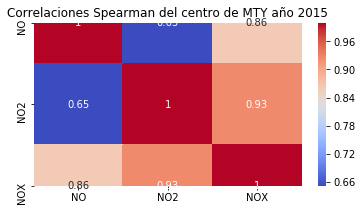

In [16]:
df_corr=df["CENTRO"][["NO","NO2","NOX"]].corr(method='spearman')
fig, ax = plt.subplots(figsize=(6,3))
sns.heatmap(df_corr, annot=True, ax=ax, cmap = "coolwarm")
plt.title('Correlaciones Spearman del centro de MTY año 2015')
plt.show()
#NOX correlación spearman con NO y NO2: .86 y .93 respectivamente

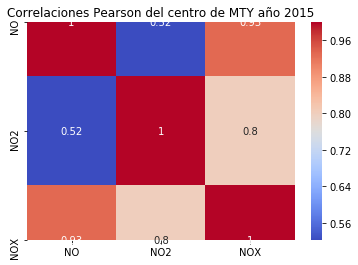

In [17]:
df_corr=df["CENTRO"][["NO","NO2","NOX"]].corr(method='pearson')
sns.heatmap(df_corr, annot=True, cmap = "coolwarm")
plt.title('Correlaciones Pearson del centro de MTY año 2015')
plt.show()
#NOX correlación Pearson con NO y NO2: .93 y .8 respectivamente

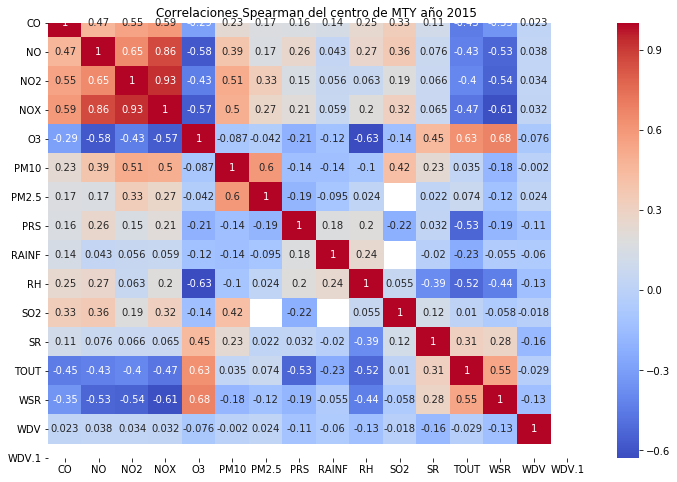

In [18]:
df_corr=df.xs('CENTRO', level=0, axis=1).corr(method='spearman')
fig, ax = plt.subplots(figsize=(12,8))
sns.heatmap(df_corr, annot=True, ax=ax, cmap = "coolwarm")
plt.title('Correlaciones Spearman del centro de MTY año 2015')
plt.show()

Algunas conclusiones del mapa de correlaciones del centro de MTY:  
 - TOUT (temperatura) tiene una moderada correlación positiva con el Ozono (O3) y  
 negativa con NOX, CO, PRS (presión atmosférica), RH (humedad) y WSR (vel. del viento). 
 - WSR juega un papel moderado con la cant. de contaminantes medidos y TOUT.  
 - O3 tiene correlaciones moderadas negativas con RH y NOX.

Eliminaremos "NO2" y "NO" del DF completo para facilitar el análisis.

In [19]:
df.drop('NO', axis = 1, level = 1, inplace = True)
df.drop('NO2', axis = 1, level = 1, inplace = True)

In [20]:
df.xs('TOUT', level=1, axis=1).mean()
#Promedio de temperatura 10 estaciones meteorológicas.

SURESTE     21.561846
NORESTE     21.895333
CENTRO      21.921892
NOROESTE    22.015740
SUROESTE    21.021032
GARCIA      21.613258
NORTE       22.468271
NORESTE2    22.189640
SURESTE2    22.188982
SANPEDRO    21.395354
dtype: float64

In [21]:
df.xs('TOUT', level=1, axis=1).std()

SURESTE     7.159755
NORESTE     7.133752
CENTRO      7.167419
NOROESTE    6.942743
SUROESTE    7.072469
GARCIA      7.204083
NORTE       7.089208
NORESTE2    7.233571
SURESTE2    7.151774
SANPEDRO    6.928744
dtype: float64

In [22]:
df.xs('TOUT', level=1, axis=1).median()

SURESTE     22.530000
NORESTE     22.870000
CENTRO      23.080000
NOROESTE    23.129999
SUROESTE    22.280000
GARCIA      22.470000
NORTE       23.340000
NORESTE2    23.190001
SURESTE2    23.070000
SANPEDRO    22.700000
dtype: float64

D:\Anaconda\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
D:\Anaconda\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


Text(0, 0.5, 'Frecuencia')

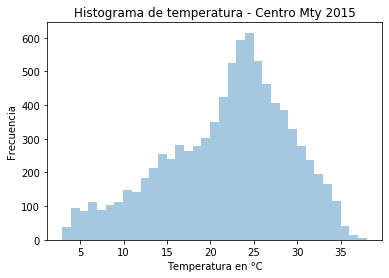

In [23]:
sns.distplot(df["CENTRO"]["TOUT"], bins = 35, kde=False) #Sesgado a la izq.
plt.title("Histograma de temperatura - Centro Mty 2015")
plt.xlabel("Temperatura en °C")
plt.ylabel("Frecuencia")

<h2><center>Análisis de NA's </center></h2>

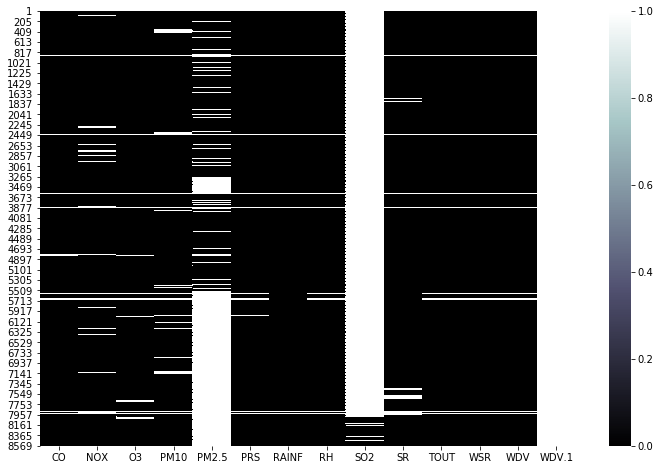

In [24]:
#NA's CENTRO 
fig, ax = plt.subplots(figsize=(12,8))
sns.heatmap(df.xs("CENTRO", level = 0, axis = 1).isnull(), ax=ax, cmap="bone")

In [25]:
df["CENTRO"].isnull().sum()/len(df)*100

CO         2.043379
NOX        4.714612
O3         3.378995
PM10       5.433790
PM2.5     49.360731
PRS        1.815068
RAINF      1.118721
RH         1.929224
SO2       93.847032
SR         4.246575
TOUT       1.712329
WSR        1.746575
WDV        1.609589
WDV.1    100.000000
dtype: float64

In [26]:
df.drop(('CENTRO','SO2'), axis = 1, inplace = True)
df.drop(('CENTRO','PM2.5'), axis = 1, inplace = True)
df.drop(('CENTRO','WDV.1'), axis = 1, inplace = True)

<center>Viendo outliers</center>

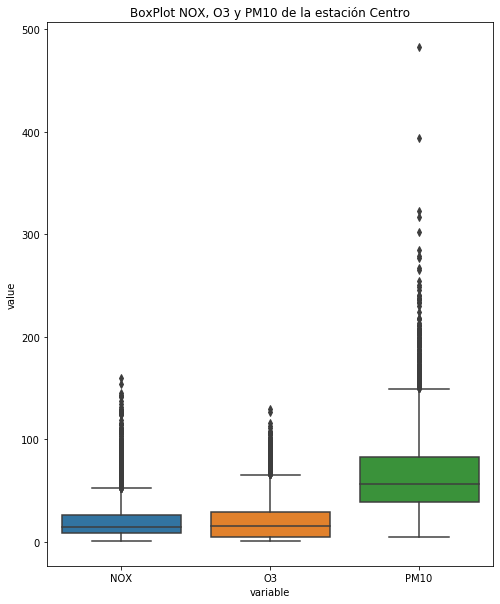

In [27]:
plt.figure(figsize=(8,10))
sns.boxplot(x="variable", y="value", data = pd.melt(df.xs("CENTRO", level = 0, axis = 1).iloc[:,1:4]))
plt.title("BoxPlot NOX, O3 y PM10 de la estación Centro")
plt.show()

<center>Como era de esperarse, hay outliers. En este caso, son necesarios,  
ya que queremos encontrar anomalías. </center>

In [28]:
df_centro = df.xs("CENTRO", level = 0, axis = 1) #DF del centro sin multiindex
values_centro = {"CO": df_centro["CO"].median(),
                 "NOX": df_centro["NOX"].median(),
                 "O3": df_centro["O3"].median(),
                 "PM10": df_centro["PM10"].median(),
                 "PRS": df_centro["PRS"].median(),
                 "RAINF": df_centro["RAINF"].median(),
                 "RH": df_centro["RH"].median(),
                 "SR": df_centro["SR"].median(),
                 "TOUT": df_centro["TOUT"].median(),
                 "WSR": df_centro["WSR"].median(),
                 "WDV": df_centro["WDV"].median()}

In [29]:
df_centro.fillna(value=values_centro, inplace = True)
df_centro.isnull().sum()/len(df)*100

D:\Anaconda\lib\site-packages\pandas\core\generic.py:6287: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


CO       0.0
NOX      0.0
O3       0.0
PM10     0.0
PRS      0.0
RAINF    0.0
RH       0.0
SR       0.0
TOUT     0.0
WSR      0.0
WDV      0.0
dtype: float64

Repetimos el mismo proceso para cada estación.

<h4><center>Sureste - Análisis de NA's</center></h4>

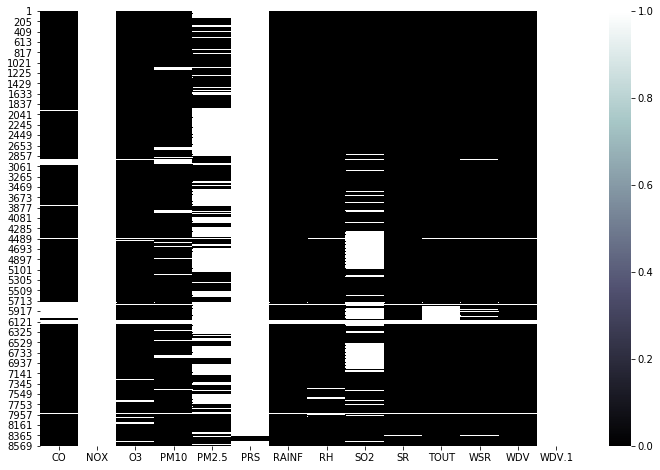

In [30]:
#NA's SURESTE
fig, ax = plt.subplots(figsize=(12,8))
sns.heatmap(df.xs("SURESTE", level = 0, axis = 1).isnull(), ax=ax, cmap="bone")

In [31]:
df["SURESTE"].isnull().sum()/len(df)*100

CO         6.392694
NOX      100.000000
O3         3.356164
PM10       7.271689
PM2.5     52.214612
PRS       98.036530
RAINF      1.175799
RH         2.442922
SO2       25.308219
SR         1.438356
TOUT       4.417808
WSR        2.271689
WDV        1.312785
WDV.1    100.000000
dtype: float64

In [32]:
#Quitamos columnas con más de 15 % de NA's (valor arbitrario)
df.drop(('SURESTE','PM2.5'), axis = 1, inplace = True)
df.drop(('SURESTE','PRS'), axis = 1, inplace = True)
df.drop(('SURESTE','SO2'), axis = 1, inplace = True)
df.drop(('SURESTE','WDV.1'), axis = 1, inplace = True)
df.drop(('SURESTE','NOX'), axis = 1, inplace = True)

df_sureste = df.xs("SURESTE", level = 0, axis = 1) #DF del sureste sin multiindex
values_sureste = {"CO": df_sureste["CO"].median(),
                 "O3": df_sureste["O3"].median(),
                 "PM10": df_sureste["PM10"].median(),
                 "RAINF": df_sureste["RAINF"].median(),
                 "RH": df_sureste["RH"].median(),
                 "SR": df_sureste["SR"].median(),
                 "TOUT": df_sureste["TOUT"].median(),
                 "WSR": df_sureste["WSR"].median(),
                 "WDV": df_sureste["WDV"].median()}

#Llenamos NA's por su respectiva mediana.
df_sureste.fillna(value=values_sureste, inplace = True)
df_sureste.isnull().sum()/len(df)*100

CO       0.0
O3       0.0
PM10     0.0
RAINF    0.0
RH       0.0
SR       0.0
TOUT     0.0
WSR      0.0
WDV      0.0
dtype: float64

<h4><center>Noreste - Análisis de NA's</center></h4>

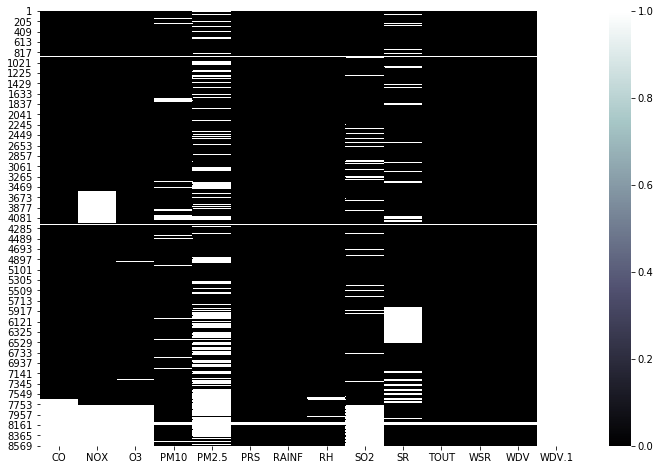

In [33]:
#NA's NORESTE
fig, ax = plt.subplots(figsize=(12,8))
sns.heatmap(df.xs("NORESTE", level = 0, axis = 1).isnull(), ax=ax, cmap="bone")

In [34]:
df["NORESTE"].isnull().sum()/len(df)*100

CO        13.116438
NOX       18.744292
O3        12.374429
PM10       6.130137
PM2.5     35.410959
PRS        1.095890
RAINF      0.993151
RH         1.883562
SO2       16.780822
SR        16.141553
TOUT       1.015982
WSR        1.187215
WDV        1.141553
WDV.1    100.000000
dtype: float64

D:\Anaconda\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


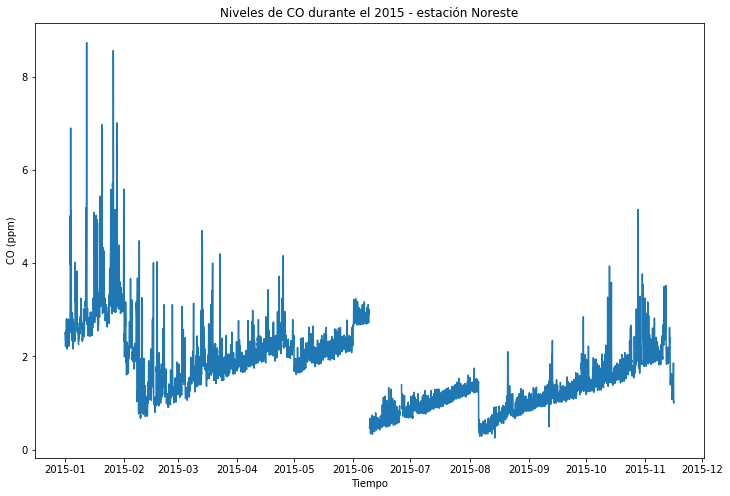

In [35]:
#CO plot noreste
df_noreste_test = df.xs("NORESTE", level = 0, axis = 1)
fig, ax = plt.subplots(figsize=(12,8))
plt.plot(df.loc[:,("CE-MET","DATE")],df_noreste_test["CO"])
plt.title("Niveles de CO durante el 2015 - estación Noreste")
plt.xlabel("Tiempo")
plt.ylabel("CO (ppm)")
plt.show()

¿Qué ocurrió en junio? Pareciera como si recalibraran el sensor para arrojar otros datos.  
Verificaremos después si es debido al sensor o algún otro suceso.

In [36]:
df_noreste_test["CO"].iloc[0:4100].median()

2.08

In [37]:
df_noreste_test["CO"].iloc[4101:-1].median() 
#Mediana antes y después de la anomalía

1.190000057220459

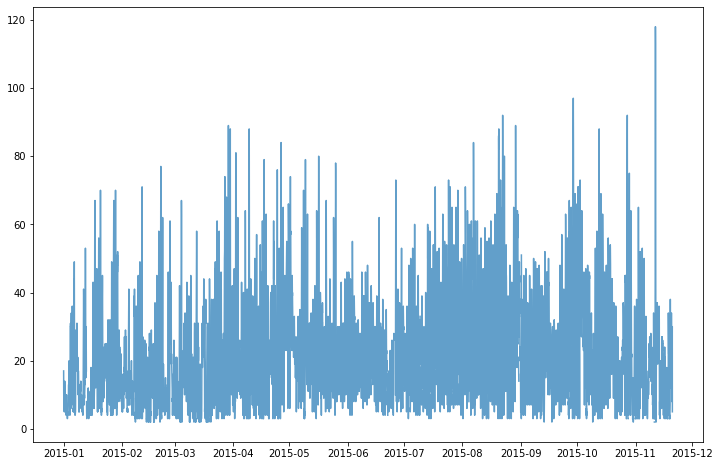

In [38]:
#O3 plot noreste
fig, ax = plt.subplots(figsize=(12,8))
plt.plot(df["CE-MET"]["DATE"],df_noreste_test["O3"], alpha=0.7)
plt.show()

In [39]:
df_noreste_test["O3"].median()

18.0

In [40]:
#Quitamos columnas con más de 15 % de NA's (valor arbitrario)
df.drop(('NORESTE','PM2.5'), axis = 1, inplace = True)
df.drop(('NORESTE','NOX'), axis = 1, inplace = True)
df.drop(('NORESTE','SO2'), axis = 1, inplace = True)
df.drop(('NORESTE','SR'), axis = 1, inplace = True)
df.drop(('NORESTE','WDV.1'), axis = 1, inplace = True)


df_noreste = df.xs("NORESTE", level = 0, axis = 1)

values_noreste = {"CO": df_noreste["CO"].iloc[6000:-1].median(),
                 "O3": df_noreste["O3"].median(),
                 "PM10": df_noreste["PM10"].median(),
                 "PRS": df_noreste["PRS"].median(),
                 "RAINF": df_noreste["RAINF"].median(),
                 "RH": df_noreste["RH"].median(),
                 "TOUT": df_noreste["TOUT"].median(),
                 "WSR": df_noreste["WSR"].median(),
                 "WDV": df_noreste["WDV"].median()}

#Llenamos NA's por su respectiva mediana.
df_noreste.fillna(value=values_noreste, inplace = True)
df_noreste.isnull().sum()/len(df)*100

CO       0.0
O3       0.0
PM10     0.0
PRS      0.0
RAINF    0.0
RH       0.0
TOUT     0.0
WSR      0.0
WDV      0.0
dtype: float64

<h4><center>Noroeste - Análisis de NA's</center></h4>

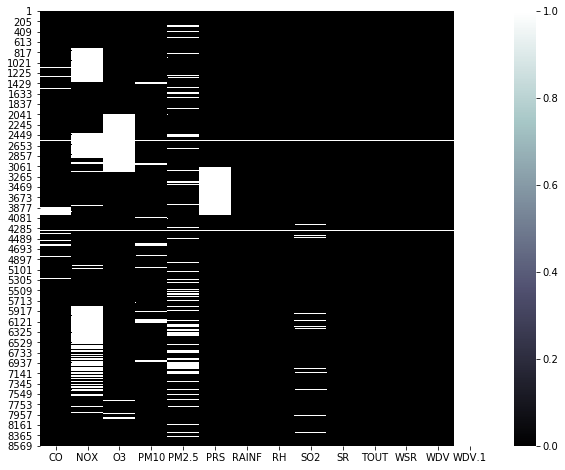

In [41]:
#NA's NOROESTE
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(df.xs("NOROESTE", level = 0, axis = 1).isnull(), ax=ax, cmap="bone")

In [42]:
df["NOROESTE"].isnull().sum()/len(df)*100

CO         4.520548
NOX       31.598174
O3        15.273973
PM10       4.760274
PM2.5     13.253425
PRS       11.529680
RAINF      0.776256
RH         0.936073
SO2        3.847032
SR         0.719178
TOUT       0.856164
WSR        0.924658
WDV        0.867580
WDV.1    100.000000
dtype: float64

In [43]:
#Quitamos columnas con más de 15 % de NA's
df.drop(('NOROESTE','NOX'), axis = 1, inplace = True)
df.drop(('NOROESTE','O3'), axis = 1, inplace = True)
df.drop(('NOROESTE','WDV.1'), axis = 1, inplace = True)

df_noroeste = df.xs("NOROESTE", level = 0, axis = 1) #DF del noroeste sin multiindex
values_noroeste = {"CO": df_noroeste["CO"].median(),
                  "PM2.5": df_noroeste["PM2.5"].median(),
                  "PRS": df_noroeste["PRS"].median(),
                  "SO2": df_noroeste["SO2"].median(),
                 "PM10": df_noroeste["PM10"].median(),
                 "RAINF": df_noroeste["RAINF"].median(),
                 "RH": df_noroeste["RH"].median(),
                 "SR": df_noroeste["SR"].median(),
                 "TOUT": df_noroeste["TOUT"].median(),
                 "WSR": df_noroeste["WSR"].median(),
                 "WDV": df_noroeste["WDV"].median()}

#Llenamos NA's por su respectiva mediana.
df_noroeste.fillna(value=values_noroeste, inplace = True)
df_noroeste.isnull().sum()/len(df)*100

CO       0.0
PM10     0.0
PM2.5    0.0
PRS      0.0
RAINF    0.0
RH       0.0
SO2      0.0
SR       0.0
TOUT     0.0
WSR      0.0
WDV      0.0
dtype: float64

<h4><center>Suroeste - Análisis de NA's</center></h4>

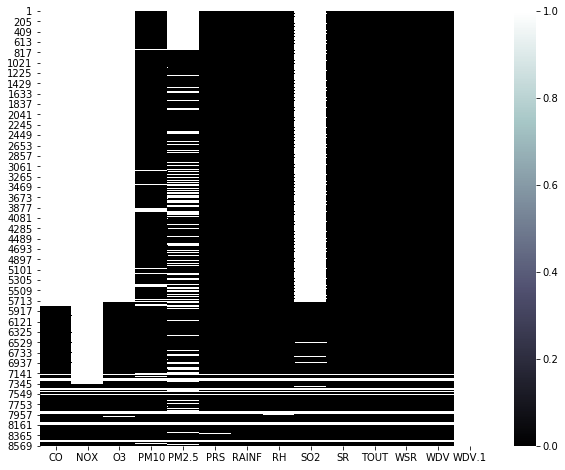

In [44]:
#NA's SUROESTE
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(df.xs("SUROESTE", level = 0, axis = 1).isnull(), ax=ax, cmap="bone")

In [45]:
df["SUROESTE"].isnull().sum()/len(df)*100

CO        69.360731
NOX       86.221461
O3        69.178082
PM10       7.762557
PM2.5     37.397260
PRS        3.538813
RAINF      2.773973
RH         3.207763
SO2       68.904110
SR         2.773973
TOUT       3.105023
WSR        2.945205
WDV        2.899543
WDV.1    100.000000
dtype: float64

In [46]:
#Quitamos columnas con más de 15 % de NA's
df.drop(('SUROESTE','NOX'), axis = 1, inplace = True)
df.drop(('SUROESTE','O3'), axis = 1, inplace = True)
df.drop(('SUROESTE','WDV.1'), axis = 1, inplace = True)
df.drop(('SUROESTE','CO'), axis = 1, inplace = True)
df.drop(('SUROESTE','PM2.5'), axis = 1, inplace = True)
df.drop(('SUROESTE','SO2'), axis = 1, inplace = True)

In [47]:
df_suroeste = df.xs("SUROESTE", level = 0, axis = 1) #DF del suroeste sin multiindex
values_suroeste = {"PRS": df_suroeste["PRS"].median(),
                 "PM10": df_suroeste["PM10"].median(),
                 "RAINF": df_suroeste["RAINF"].median(),
                 "RH": df_suroeste["RH"].median(),
                 "SR": df_suroeste["SR"].median(),
                 "TOUT": df_suroeste["TOUT"].median(),
                 "WSR": df_suroeste["WSR"].median(),
                 "WDV": df_suroeste["WDV"].median()}

#Llenamos NA's por su respectiva mediana.
df_suroeste.fillna(value=values_suroeste, inplace = True)
df_suroeste.isnull().sum()/len(df)*100

PM10     0.0
PRS      0.0
RAINF    0.0
RH       0.0
SR       0.0
TOUT     0.0
WSR      0.0
WDV      0.0
dtype: float64

<h4><center>García - Análisis de NA's</center></h4>

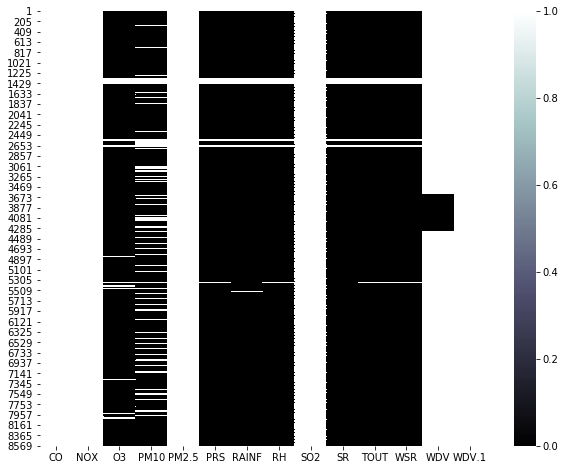

In [48]:
#NA's GARCIA
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(df.xs("GARCIA", level = 0, axis = 1).isnull(), ax=ax, cmap="bone")

In [49]:
df["GARCIA"].isnull().sum()/len(df)*100

CO       100.000000
NOX      100.000000
O3         4.132420
PM10      16.187215
PM2.5    100.000000
PRS        2.488584
RAINF      2.328767
RH         2.808219
SO2      100.000000
SR         2.283105
TOUT       2.488584
WSR        2.511416
WDV       91.780822
WDV.1    100.000000
dtype: float64

In [50]:
#Quitamos columnas con más de 15 % de NA's
df.drop(('GARCIA','CO'), axis = 1, inplace = True)
df.drop(('GARCIA','NOX'), axis = 1, inplace = True)
df.drop(('GARCIA','PM10'), axis = 1, inplace = True)
df.drop(('GARCIA','PM2.5'), axis = 1, inplace = True)
df.drop(('GARCIA','WDV'), axis = 1, inplace = True)
df.drop(('GARCIA','SO2'), axis = 1, inplace = True)
df.drop(("GARCIA","WDV.1"), axis = 1, inplace = True)

In [51]:
df_garcia = df.xs("GARCIA", level = 0, axis = 1) #DF de garcía sin multiindex
values_garcia = {"PRS": df_garcia["PRS"].median(),
                 "RAINF": df_garcia["RAINF"].median(),
                 "RH": df_garcia["RH"].median(),
                 "SR": df_garcia["SR"].median(),
                 "TOUT": df_garcia["TOUT"].median(),
                 "WSR": df_garcia["WSR"].median(),
                 "O3": df_garcia["O3"].median()}

#Llenamos NA's por su respectiva mediana.
df_garcia.fillna(value=values_garcia, inplace = True)
df_garcia.isnull().sum()/len(df)*100

O3       0.0
PRS      0.0
RAINF    0.0
RH       0.0
SR       0.0
TOUT     0.0
WSR      0.0
dtype: float64

<h4><center>Norte - Análisis de NA's</center></h4>

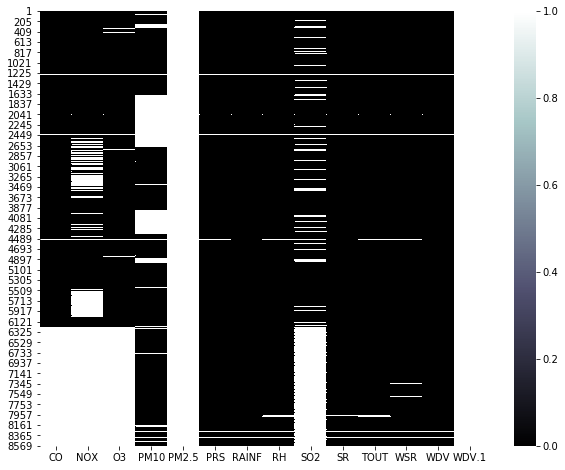

In [52]:
#NA's NORTE
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(df.xs("NORTE", level = 0, axis = 1).isnull(), ax=ax, cmap="bone")

In [53]:
df["NORTE"].isnull().sum()/len(df)*100

CO        29.463470
NOX       45.000000
O3        30.114155
PM10      23.264840
PM2.5    100.000000
PRS        1.552511
RAINF      1.095890
RH         1.986301
SO2       36.232877
SR         1.198630
TOUT       1.906393
WSR        1.735160
WDV        1.141553
WDV.1    100.000000
dtype: float64

In [54]:
#Quitamos columnas con más de 15 % de NA's
df.drop(('NORTE','CO'), axis = 1, inplace = True)
df.drop(('NORTE','NOX'), axis = 1, inplace = True)
df.drop(('NORTE','PM10'), axis = 1, inplace = True)
df.drop(('NORTE','PM2.5'), axis = 1, inplace = True)
df.drop(('NORTE','SO2'), axis = 1, inplace = True)
df.drop(("NORTE","WDV.1"), axis = 1, inplace = True)
df.drop(("NORTE","O3"), axis = 1, inplace = True)

In [55]:
df_norte = df.xs("NORTE", level = 0, axis = 1) #DF del norte sin multiindex
values_norte = {"PRS": df_norte["PRS"].median(),
                 "RAINF": df_norte["RAINF"].median(),
                 "RH": df_norte["RH"].median(),
                 "SR": df_norte["SR"].median(),
                 "TOUT": df_norte["TOUT"].median(),
                 "WSR": df_norte["WSR"].median(),
                 "WDV": df_norte["WDV"].median()}

#Llenamos NA's por su respectiva mediana.
df_norte.fillna(value=values_norte, inplace = True)
df_norte.isnull().sum()/len(df)*100

PRS      0.0
RAINF    0.0
RH       0.0
SR       0.0
TOUT     0.0
WSR      0.0
WDV      0.0
dtype: float64

<h4><center>Noreste 2 - Análisis de NA's</center></h4>

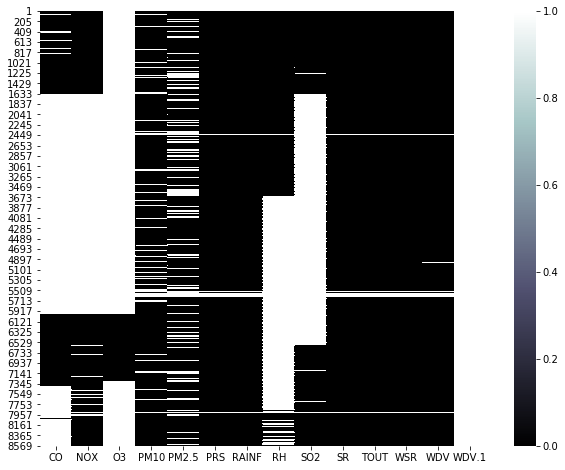

In [56]:
#NA's noreste2
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(df.xs("NORESTE2", level = 0, axis = 1).isnull(), ax=ax, cmap="bone")

In [57]:
df["NORESTE2"].isnull().sum()/len(df)*100

CO        66.803653
NOX       54.018265
O3        85.182648
PM10      10.102740
PM2.5     22.363014
PRS        1.837900
RAINF      1.689498
RH        51.837900
SO2       58.127854
SR         1.689498
TOUT       1.757991
WSR        1.746575
WDV        1.780822
WDV.1    100.000000
dtype: float64

In [58]:
#Quitamos columnas con más de 15 % de NA's
df.drop(('NORESTE2','CO'), axis = 1, inplace = True)
df.drop(('NORESTE2','NOX'), axis = 1, inplace = True)
df.drop(('NORESTE2','O3'), axis = 1, inplace = True)
df.drop(('NORESTE2','PM2.5'), axis = 1, inplace = True)
df.drop(('NORESTE2','RH'), axis = 1, inplace = True)
df.drop(("NORESTE2","WDV.1"), axis = 1, inplace = True)
df.drop(("NORESTE2","SO2"), axis = 1, inplace = True)

In [59]:
df_noreste2 = df.xs("NORESTE2", level = 0, axis = 1) #DF del norte sin multiindex
values_noreste2 = {"PRS": df_noreste2["PRS"].median(),
                 "RAINF": df_noreste2["RAINF"].median(),
                 "PM10": df_noreste2["PM10"].median(),
                 "SR": df_noreste2["SR"].median(),
                 "TOUT": df_noreste2["TOUT"].median(),
                 "WSR": df_noreste2["WSR"].median(),
                 "WDV": df_noreste2["WDV"].median()}

#Llenamos NA's por su respectiva mediana.
df_noreste2.fillna(value=values_noreste2, inplace = True)
df_noreste2.isnull().sum()/len(df)*100

PM10     0.0
PRS      0.0
RAINF    0.0
SR       0.0
TOUT     0.0
WSR      0.0
WDV      0.0
dtype: float64

<h4><center>Sureste 2 - Análisis de NA's</center></h4>

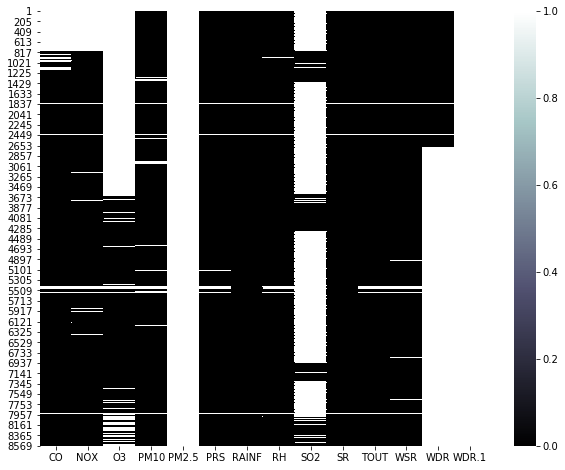

In [60]:
#NA's SURESTE 2
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(df.xs("SURESTE2", level = 0, axis = 1).isnull(), ax=ax, cmap="bone")

In [61]:
df["SURESTE2"].isnull().sum()/len(df)*100

CO        11.712329
NOX       10.890411
O3        49.703196
PM10       4.143836
PM2.5    100.000000
PRS        1.267123
RAINF      0.376712
RH         1.187215
SO2       75.547945
SR         0.376712
TOUT       1.118721
WSR        1.849315
WDR       69.429224
WDR.1    100.000000
dtype: float64

In [62]:
#Quitamos columnas con más de 15 % de NA's
df.drop(('SURESTE2','O3'), axis = 1, inplace = True)
df.drop(('SURESTE2','PM2.5'), axis = 1, inplace = True)
df.drop(('SURESTE2','SO2'), axis = 1, inplace = True)
df.drop(("SURESTE2","WDR"), axis = 1, inplace = True)
df.drop(("SURESTE2","WDR.1"), axis = 1, inplace = True)

In [63]:
df_sureste2 = df.xs("SURESTE2", level = 0, axis = 1) #DF del sureste2 sin multiindex
values_sureste2 = {"CO": df_sureste2["CO"].median(),
                 "NOX": df_sureste2["NOX"].median(),
                 "PM10": df_sureste2["PM10"].median(),
                 "SR": df_sureste2["SR"].median(),
                 "TOUT": df_sureste2["TOUT"].median(),
                 "WSR": df_sureste2["WSR"].median(),
                 "RAINF": df_sureste2["RAINF"].median(),
                 "RH": df_sureste2["RH"].median(),
                 "PRS": df_sureste2["PRS"].median()}

#Llenamos NA's por su respectiva mediana.
df_sureste2.fillna(value=values_sureste2, inplace = True)
df_sureste2.isnull().sum()/len(df)*100

CO       0.0
NOX      0.0
PM10     0.0
PRS      0.0
RAINF    0.0
RH       0.0
SR       0.0
TOUT     0.0
WSR      0.0
dtype: float64

<h4><center>San Pedro - Análisis de NA's</center></h4>

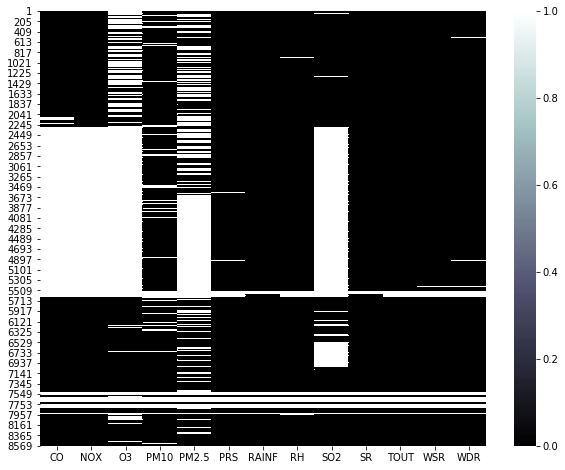

In [64]:
#NA's SAN PEDRO
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(df.xs("SANPEDRO", level = 0, axis = 1).isnull(), ax=ax, cmap="bone")

In [65]:
df["SANPEDRO"].isnull().sum()/len(df)*100

CO       41.792237
NOX      40.970320
O3       56.689498
PM10     11.621005
PM2.5    55.011416
PRS       4.383562
RAINF     3.447489
RH        4.383562
SO2      48.904110
SR        3.481735
TOUT      4.052511
WSR       4.155251
WDR       4.474886
dtype: float64

In [66]:
#Quitamos columnas con más de 15 % de NA's
df.drop(('SANPEDRO','CO'), axis = 1, inplace = True)
df.drop(('SANPEDRO','NOX'), axis = 1, inplace = True)
df.drop(('SANPEDRO','O3'), axis = 1, inplace = True)
df.drop(("SANPEDRO","PM2.5"), axis = 1, inplace = True)
df.drop(("SANPEDRO","SO2"), axis = 1, inplace = True)

In [67]:
df_sanpedro = df.xs("SANPEDRO", level = 0, axis = 1) #DF de San Pedro sin multiindex
values_sanpedro = {"WDR": df_sanpedro["WDR"].median(),
                 "PM10": df_sanpedro["PM10"].median(),
                 "SR": df_sanpedro["SR"].median(),
                 "TOUT": df_sanpedro["TOUT"].median(),
                 "WSR": df_sanpedro["WSR"].median(),
                 "RAINF": df_sanpedro["RAINF"].median(),
                 "RH": df_sanpedro["RH"].median(),
                 "PRS": df_sanpedro["PRS"].median()}

#Llenamos NA's por su respectiva mediana.
df_sanpedro.fillna(value=values_sanpedro, inplace = True)
df_sanpedro.isnull().sum()/len(df)*100

PM10     0.0
PRS      0.0
RAINF    0.0
RH       0.0
SR       0.0
TOUT     0.0
WSR      0.0
WDR      0.0
dtype: float64

In [68]:
# Agregamos el nombre de la estación a todos los DF para
# dejar de trabajar con multiindex.
df_sanpedro.rename(columns = lambda x: x+"_SP", inplace = True)
df_norte.rename(columns = lambda x: x+"_NTE", inplace = True)
df_sureste.rename(columns = lambda x: x+"_SE", inplace = True)
df_sureste2.rename(columns = lambda x: x+"_SE2", inplace = True)
df_noreste.rename(columns = lambda x: x+"_NE", inplace = True)
df_noreste2.rename(columns = lambda x: x+"_NE2", inplace = True)
df_suroeste.rename(columns = lambda x: x+"_SOE", inplace = True)
df_noroeste.rename(columns = lambda x: x+"_NOE", inplace = True)
df_garcia.rename(columns = lambda x: x+"_GARCIA", inplace = True)
df_centro.rename(columns = lambda x: x+"_CENTRO", inplace = True)

D:\Anaconda\lib\site-packages\pandas\core\frame.py:4223: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(**kwargs)


In [69]:
#Los agrupamos todos en un mismo DF.
estaciones = [df_sanpedro, df_norte, df_sureste, df_sureste2, df_noreste, df_noreste2,
              df_suroeste, df_noroeste, df_garcia, df_centro]

new_df = pd.concat(estaciones, axis = 1)

<center>Podemos acceder a las variables y estaciones específicas que querramos  
con filter</center>

In [70]:
new_df.filter(like = "CENTRO") #Variables del centro

,CO_CENTRO,NOX_CENTRO,O3_CENTRO,PM10_CENTRO,PRS_CENTRO,RAINF_CENTRO,RH_CENTRO,SR_CENTRO,TOUT_CENTRO,WSR_CENTRO,WDV_CENTRO
1,2.39,10.6,4.0,26.0,716.800000,0.00,97.0,0.001,4.39,4.9,52.0
2,2.02,10.3,3.0,44.0,716.100000,0.01,97.0,0.001,4.23,5.3,46.0
3,2.35,11.8,3.0,32.0,715.800000,0.01,97.0,0.001,4.17,4.5,65.0
4,1.92,18.8,2.0,27.0,715.300000,0.01,97.0,0.001,4.24,4.5,82.0
5,1.89,14.9,2.0,33.0,715.000000,0.00,97.0,0.001,4.18,3.9,77.0
...,...,...,...,...,...,...,...,...,...,...,...
8756,0.90,18.0,2.0,41.0,716.200012,0.00,98.0,0.000,10.25,5.7,59.0
8757,0.87,14.3,2.0,46.0,716.500000,0.00,96.0,0.000,10.04,5.2,53.0
8758,0.89,12.7,4.0,43.0,716.799988,0.00,91.0,0.000,10.09,4.9,70.0
8759,1.01,20.6,1.0,50.0,717.400024,0.00,91.0,0.000,10.02,2.6,147.0


In [71]:
new_df.filter(like = "CO") #Por variable

,CO_SE,CO_SE2,CO_NE,CO_NOE,CO_CENTRO
1,1.79,1.01,2.50,1.22,2.39
2,1.74,1.01,2.51,1.24,2.02
3,1.70,1.01,2.41,1.24,2.35
4,1.72,1.01,2.39,1.19,1.92
5,1.68,1.01,2.37,1.13,1.89
...,...,...,...,...,...
8756,0.98,1.10,1.58,1.56,0.90
8757,1.01,1.50,1.58,1.66,0.87
8758,1.12,1.36,1.58,1.47,0.89
8759,1.02,0.81,1.58,1.29,1.01


In [72]:
#¿tenemos Na's?
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8760 entries, 1 to 8760
Data columns (total 86 columns):
PM10_SP         8760 non-null float64
PRS_SP          8760 non-null float64
RAINF_SP        8760 non-null float64
RH_SP           8760 non-null float64
SR_SP           8760 non-null float64
TOUT_SP         8760 non-null float64
WSR_SP          8760 non-null float64
WDR_SP          8760 non-null float64
PRS_NTE         8760 non-null float64
RAINF_NTE       8760 non-null float64
RH_NTE          8760 non-null float64
SR_NTE          8760 non-null float64
TOUT_NTE        8760 non-null float64
WSR_NTE         8760 non-null float64
WDV_NTE         8760 non-null float64
CO_SE           8760 non-null float64
O3_SE           8760 non-null float64
PM10_SE         8760 non-null float64
RAINF_SE        8760 non-null float64
RH_SE           8760 non-null float64
SR_SE           8760 non-null float64
TOUT_SE         8760 non-null float64
WSR_SE          8760 non-null float64
WDV_SE          876

<h4><center>Mapas de correlaciones entre mismas variables de distintas estaciones.</center></h4>

<h3><center>CO</center></h3>

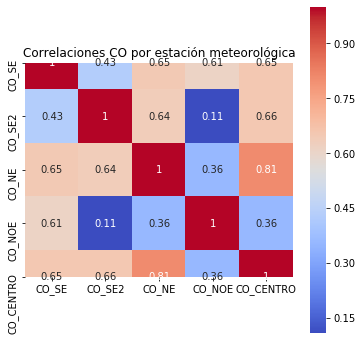

In [73]:
df_corr=new_df.filter(like = "CO").corr(method='spearman')
fig, ax = plt.subplots(figsize=(6,6))
sns.heatmap(df_corr, annot=True, ax=ax, cmap = "coolwarm", square = True)
plt.title('Correlaciones CO por estación meteorológica')
plt.show()

<center>NOX</center>

In [74]:
new_df.filter(like = "NOX").corr(method='spearman')

,NOX_SE2,NOX_CENTRO
NOX_SE2,1.000000,0.397102
NOX_CENTRO,0.397102,1.000000


Hay discrepancia entre los valores de NOX en zona Sureste 2 y Centro de Mty.
También en Sureste 2 y Noroeste 2 con CO
PM10 NE 2 con San Pedro y Centro
RAIN García está muy alejado de todos los demás.
Solar Radiation de CENTRO muy raro

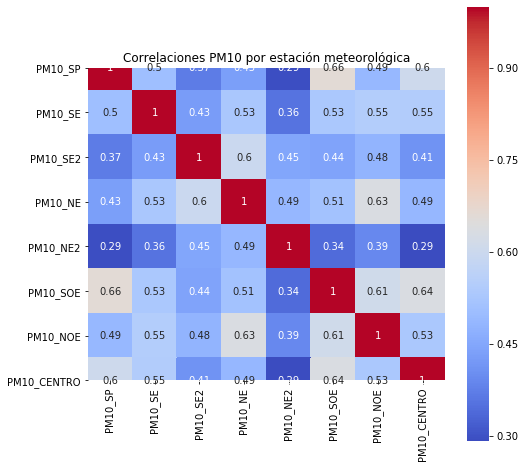

In [75]:
df_corr=new_df.filter(like = "PM10").corr(method='spearman')
fig, ax = plt.subplots(figsize=(8,8))
sns.heatmap(df_corr, annot=True, ax=ax, cmap = "coolwarm", square= True)
plt.title('Correlaciones PM10 por estación meteorológica')
plt.show()

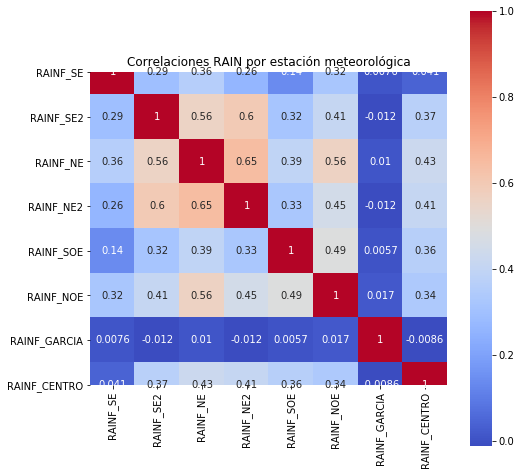

In [76]:
new_df.drop(["RAINF_SP","RAINF_NTE"], axis =1, inplace = True) #tienen solo valores 0.
df_corr = new_df.filter(like = "RAINF").corr(method='spearman')
fig, ax = plt.subplots(figsize=(8,8))
sns.heatmap(df_corr, annot=True, ax=ax, cmap = "coolwarm", square= True)
plt.title('Correlaciones RAIN por estación meteorológica')
plt.show()

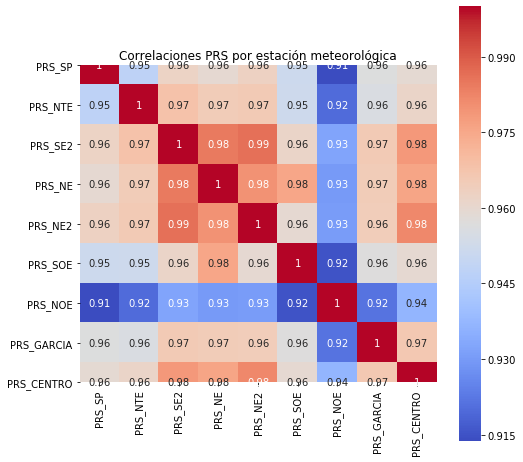

In [77]:
df_corr=new_df.filter(like = "PRS").corr(method='spearman')
fig, ax = plt.subplots(figsize=(8,8))
sns.heatmap(df_corr, annot=True, ax=ax, cmap = "coolwarm", square= True)
plt.title('Correlaciones PRS por estación meteorológica')
plt.show()

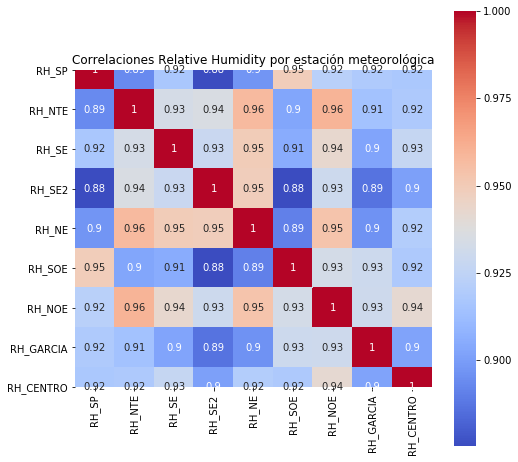

In [78]:
df_corr=new_df.filter(like = "RH").corr(method='spearman')
fig, ax = plt.subplots(figsize=(8,8))
sns.heatmap(df_corr, annot=True, ax=ax, cmap = "coolwarm", square= True)
plt.title('Correlaciones Relative Humidity por estación meteorológica')
plt.show()

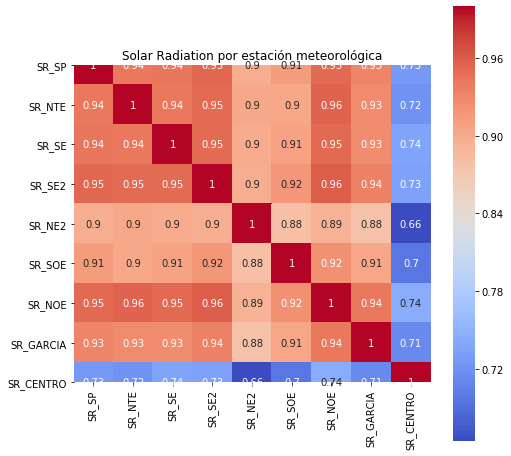

In [79]:
solar_radiation = new_df[["SR_SP","SR_NTE","SR_SE","SR_SE2","SR_NE2","SR_SOE","SR_NOE",
                         "SR_GARCIA","SR_CENTRO"]]
df_corr=solar_radiation.corr(method='spearman')
fig, ax = plt.subplots(figsize=(8,8))
sns.heatmap(df_corr, annot=True, ax=ax, cmap = "coolwarm", square= True)
plt.title('Solar Radiation por estación meteorológica')
plt.show()

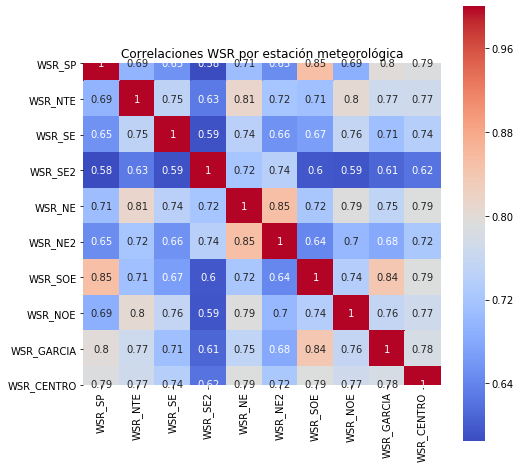

In [80]:
df_corr=new_df.filter(like = "WSR").corr(method='spearman')
fig, ax = plt.subplots(figsize=(8,8))
sns.heatmap(df_corr, annot=True, ax=ax, cmap = "coolwarm", square= True)
plt.title('Correlaciones WSR por estación meteorológica')
plt.show()

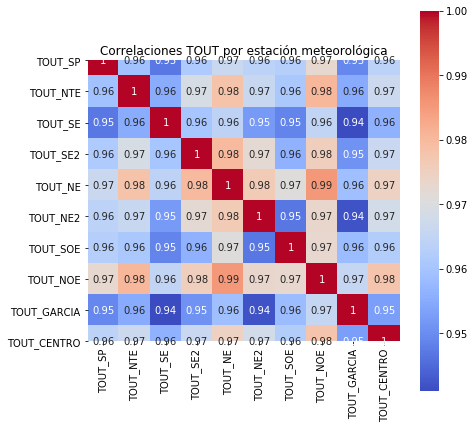

In [81]:
df_corr=new_df.filter(like = "TOUT").corr(method='spearman')
fig, ax = plt.subplots(figsize=(7,7))
sns.heatmap(df_corr, annot=True, ax=ax, cmap = "coolwarm", square= True)
plt.title('Correlaciones TOUT por estación meteorológica')
plt.show()

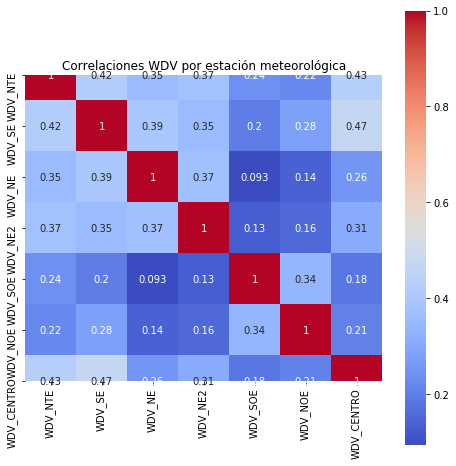

In [82]:
df_corr=new_df.filter(like = "WDV").corr(method='spearman')
fig, ax = plt.subplots(figsize=(8,8))
sns.heatmap(df_corr, annot=True, ax=ax, cmap = "coolwarm", square= True)
plt.title('Correlaciones WDV por estación meteorológica')
plt.show()

<h3><center>Insights:</center></h3>

- Discrepancia con CO en Sureste 2 y Noroeste.
- Discrepancia con PM10 Noreste 2, San Pedro y Centro.
- RAINF_García está muy alejado de todos los demás (en cuanto a correlación).
- Discrepancia con Solar Radiation en el Centro.
- No parece existir correlación con la dirección del viento entre las distintas estaciones.
- 

<h3><center>Gráficos de líneas</center></h3>

In [83]:
df_copy = new_df.copy()

In [84]:
DATE = df.xs("CE-MET", axis = 1, level = 0)
df_copy["DATE"] = DATE
df_copy.set_index("DATE", inplace = True)

<h4><center> Radiación Solar</center></h4>

D:\Anaconda\lib\site-packages\pandas\core\indexing.py:376: FutureWarning: Converting timezone-aware DatetimeArray to timezone-naive ndarray with 'datetime64[ns]' dtype. In the future, this will return an ndarray with 'object' dtype where each element is a 'pandas.Timestamp' with the correct 'tz'.
	To accept the future behavior, pass 'dtype=object'.
	To keep the old behavior, pass 'dtype="datetime64[ns]"'.
  self.obj[key] = _infer_fill_value(value)
D:\Anaconda\lib\site-packages\seaborn\relational.py:792: FutureWarning: Converting timezone-aware DatetimeArray to timezone-naive ndarray with 'datetime64[ns]' dtype. In the future, this will return an ndarray with 'object' dtype where each element is a 'pandas.Timestamp' with the correct 'tz'.
	To accept the future behavior, pass 'dtype=object'.
	To keep the old behavior, pass 'dtype="datetime64[ns]"'.
  x, y = np.asarray(x), np.asarray(y)


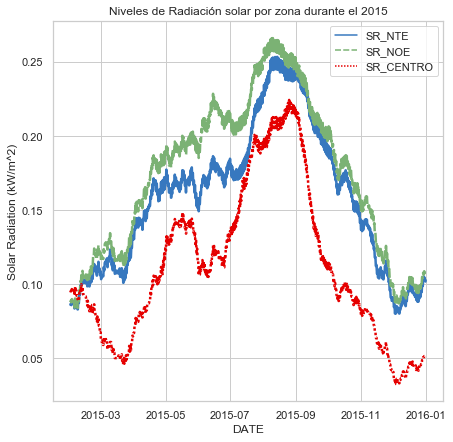

In [85]:
sns.set(style="whitegrid")
fig, ax = plt.subplots(figsize=(7,7))
sr = df_copy[["SR_NTE","SR_NOE","SR_CENTRO"]]
sr = sr.rolling(730).mean() #730 : cada mes

sns.lineplot(data=sr, palette=sns.xkcd_palette(["windows blue","faded green", "red"]), linewidth=2.5)
plt.title("Niveles de Radiación solar por zona durante el 2015")
plt.ylabel("Solar Radiation (kW/m^2)")
plt.show()

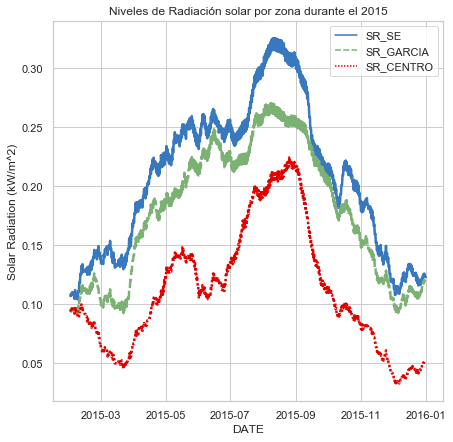

In [86]:
sns.set(style="whitegrid")
fig, ax = plt.subplots(figsize=(7,7))
sr = df_copy[["SR_SE","SR_GARCIA","SR_CENTRO"]]
sr = sr.rolling(730).mean() #730 : cada mes

sns.lineplot(data=sr, palette=sns.xkcd_palette(["windows blue","faded green", "red"]), linewidth=2.5)
plt.title("Niveles de Radiación solar por zona durante el 2015")
plt.ylabel("Solar Radiation (kW/m^2)")
plt.show()

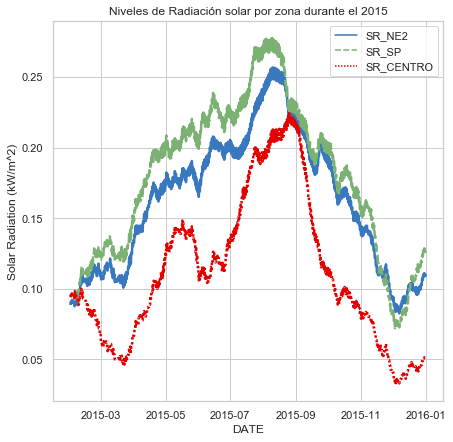

In [87]:
sns.set(style="whitegrid")
fig, ax = plt.subplots(figsize=(7,7))
sr = df_copy[["SR_NE2","SR_SP","SR_CENTRO"]]
sr = sr.rolling(730).mean() #730 : cada mes

sns.lineplot(data=sr, palette=sns.xkcd_palette(["windows blue","faded green", "red"]), linewidth=2.5)
plt.title("Niveles de Radiación solar por zona durante el 2015")
plt.ylabel("Solar Radiation (kW/m^2)")
plt.show()

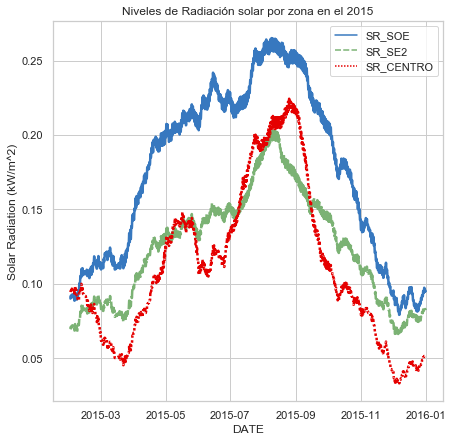

In [88]:
sns.set(style="whitegrid")
fig, ax = plt.subplots(figsize=(7,7))
sr = df_copy[["SR_SOE","SR_SE2","SR_CENTRO"]]
sr = sr.rolling(730).mean() #730 = cada mes

sns.lineplot(data=sr, palette=sns.xkcd_palette(["windows blue","faded green", "red"]), linewidth=2.5)
plt.title("Niveles de Radiación solar por zona en el 2015")
plt.ylabel("Solar Radiation (kW/m^2)")
plt.show()

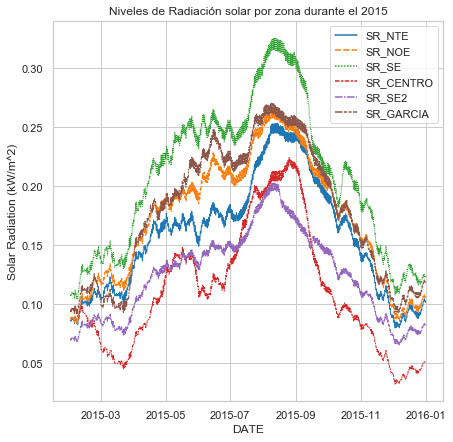

In [98]:
sns.set(style="whitegrid")
fig, ax = plt.subplots(figsize=(7,7))
sr = df_copy[["SR_NTE","SR_NOE","SR_SE","SR_CENTRO","SR_SE2","SR_GARCIA"]]
sr = sr.rolling(730).mean() #730 : cada mes

sns.lineplot(data=sr, palette="tab10", linewidth=1)
plt.title("Niveles de Radiación solar por zona durante el 2015")
plt.ylabel("Solar Radiation (kW/m^2)")
plt.show()

In [100]:
df_copy.filter(like = "WSR").mean()

WSR_SP         4.786005
WSR_NTE        7.465811
WSR_SE         6.844258
WSR_SE2        7.091929
WSR_NE         7.176199
WSR_NE2        8.972991
WSR_SOE        8.826142
WSR_NOE        9.055628
WSR_GARCIA    10.428904
WSR_CENTRO     5.879874
dtype: float64

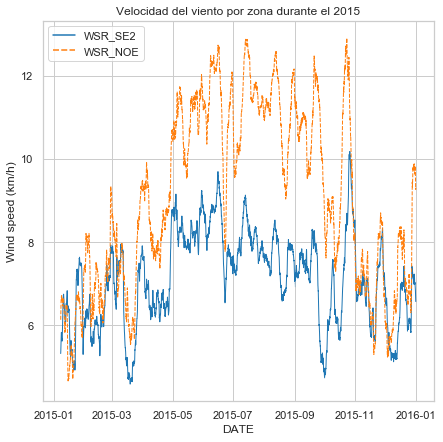

In [107]:
sns.set(style="whitegrid")
fig, ax = plt.subplots(figsize=(7,7))
sr = df_copy[["WSR_SE2","WSR_NOE"]]
sr = sr.rolling(168).mean() #730 : cada mes

sns.lineplot(data=sr, palette="tab10", linewidth=1)
plt.title("Velocidad del viento por zona durante el 2015")
plt.ylabel("Wind speed (km/h)")
plt.show()

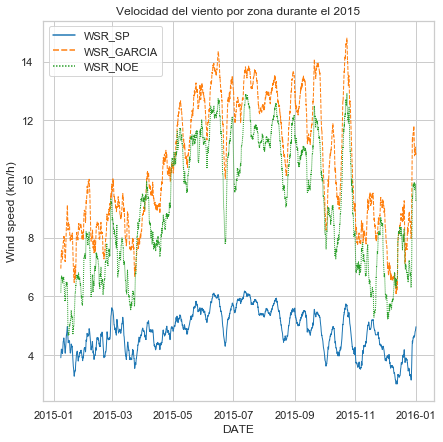

In [102]:
sns.set(style="whitegrid")
fig, ax = plt.subplots(figsize=(7,7))
sr = df_copy[["WSR_SP","WSR_GARCIA","WSR_NOE"]]
sr = sr.rolling(168).mean() #730 : cada mes

sns.lineplot(data=sr, palette="tab10", linewidth=1)
plt.title("Velocidad del viento por zona durante el 2015")
plt.ylabel("Wind speed (km/h)")
plt.show()

<h4><center> CO - Monóxido de Carbono </center></h4>

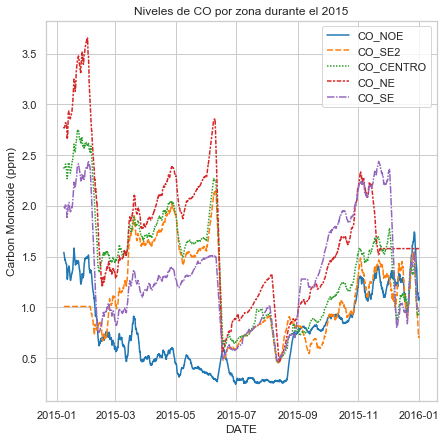

In [90]:
sns.set(style="whitegrid")
fig, ax = plt.subplots(figsize=(7,7))
sr = df_copy[["CO_NOE","CO_SE2","CO_CENTRO","CO_NE","CO_SE"]]
sr = sr.rolling(168).mean() #730 obs = 1 mes

sns.lineplot(data=sr, palette="tab10", linewidth=1.5)
plt.title("Niveles de CO por zona durante el 2015")
plt.ylabel("Carbon Monoxide (ppm)")
plt.show()

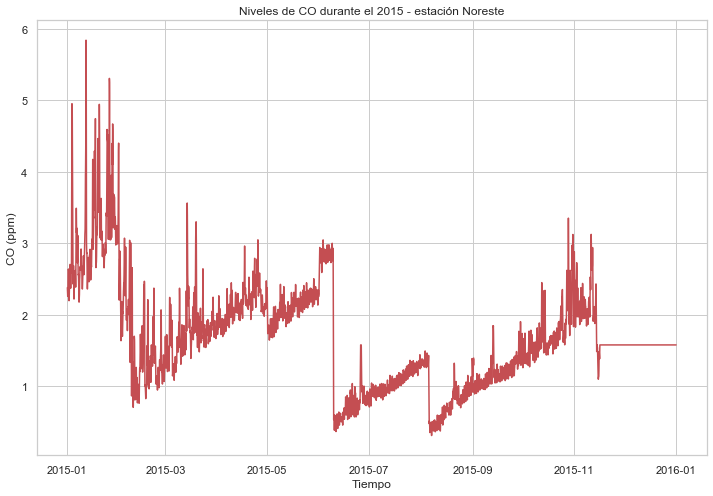

In [110]:
#CO plot noreste
fig, ax = plt.subplots(figsize=(12,8))
plt.plot(df_copy["CO_NE"].rolling(7).mean(),"r")
plt.title("Niveles de CO durante el 2015 - estación Noreste")
plt.xlabel("Tiempo")
plt.ylabel("CO (ppm)")
plt.show()

In [92]:
df_copy.filter(like = "CO").max()

CO_SE        4.42
CO_SE2       5.59
CO_NE        8.73
CO_NOE       5.91
CO_CENTRO    4.49
dtype: float64

<h4><center> NOX </center></h4>

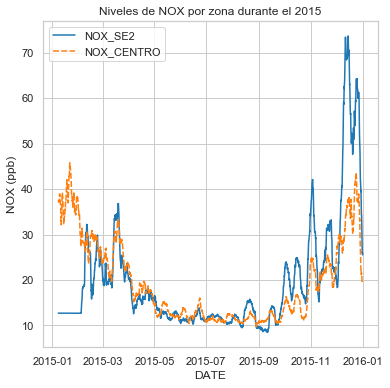

In [93]:
sns.set(style="whitegrid")
fig, ax = plt.subplots(figsize=(6,6))
sr = df_copy[["NOX_SE2","NOX_CENTRO"]]
sr = sr.rolling(168).mean() #168 obs = 1 semana

sns.lineplot(data=sr, palette="tab10", linewidth=1.5)
plt.title("Niveles de NOX por zona durante el 2015")
plt.ylabel("NOX (ppb)")
plt.show()

<h4><center> PM10 </center></h4>

In [106]:
df_copy.filter(like = "PM10").mean()

PM10_SP        64.687443
PM10_SE        55.026997
PM10_SE2       66.533790
PM10_NE        76.161986
PM10_NE2       68.184475
PM10_SOE       83.128082
PM10_NOE       70.866553
PM10_CENTRO    63.559817
dtype: float64

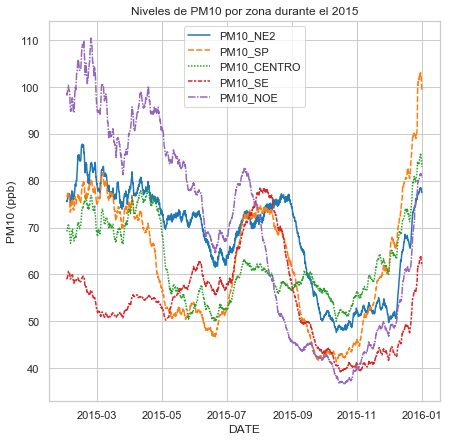

In [94]:
sns.set(style="whitegrid")
fig, ax = plt.subplots(figsize=(7,7))
sr = df_copy[["PM10_NE2","PM10_SP","PM10_CENTRO","PM10_SE","PM10_NOE"]]
sr = sr.rolling(730).mean() #730 obs = 1 mes

sns.lineplot(data=sr, palette="tab10", linewidth=1.5)
plt.title("Niveles de PM10 por zona durante el 2015")
plt.ylabel("PM10 (ug/m^3)")
plt.show()

In [95]:
new_df["PM10_NOE"].max()

593.0

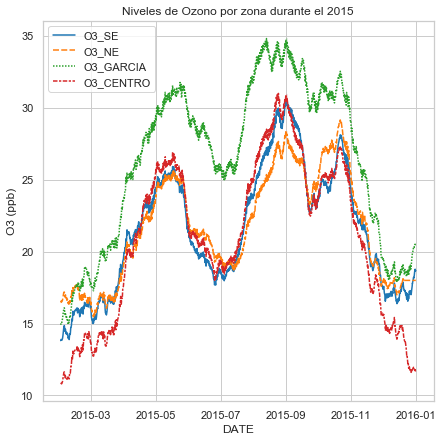

In [96]:
sns.set(style="whitegrid")
fig, ax = plt.subplots(figsize=(7,7))
sr = df_copy[["O3_SE","O3_NE","O3_GARCIA","O3_CENTRO"]]
sr = sr.rolling(730).mean() #730 obs = 1 mes

sns.lineplot(data=sr, palette="tab10", linewidth=1.5)
plt.title("Niveles de Ozono por zona durante el 2015")
plt.ylabel("O3 (ppb)")
plt.show()

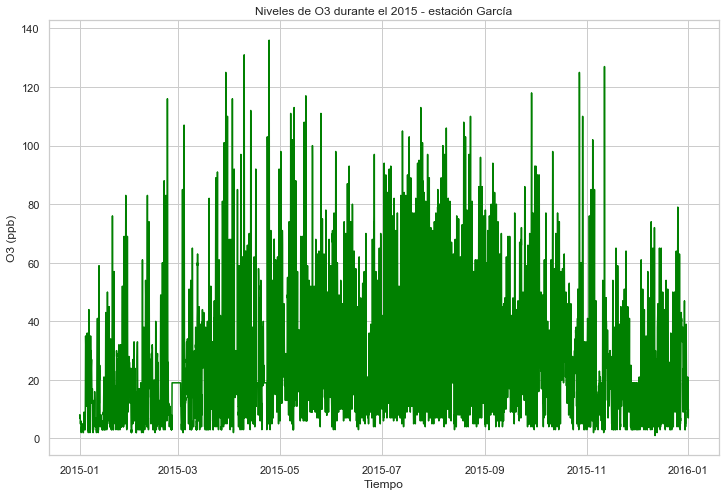

In [115]:
#CO plot noreste
fig, ax = plt.subplots(figsize=(12,8))
plt.plot(df_copy["O3_GARCIA"],"green")
plt.title("Niveles de O3 durante el 2015 - estación García")
plt.xlabel("Tiempo")
plt.ylabel("O3 (ppb)")
plt.show()

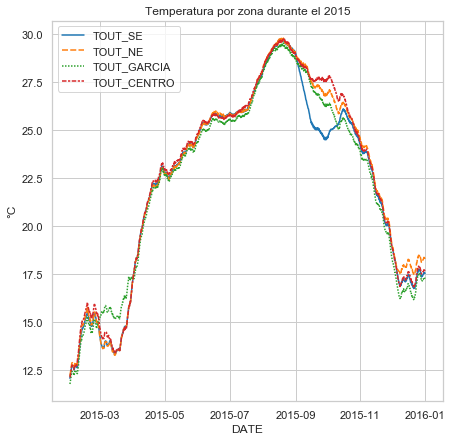

In [97]:
sns.set(style="whitegrid")
fig, ax = plt.subplots(figsize=(7,7))
sr = df_copy[["TOUT_SE","TOUT_NE","TOUT_GARCIA","TOUT_CENTRO"]]
sr = sr.rolling(730).mean() #730 obs = 1 mes

sns.lineplot(data=sr, palette="tab10", linewidth=1.5)
plt.title("Temperatura por zona durante el 2015")
plt.ylabel("°C")
plt.show()

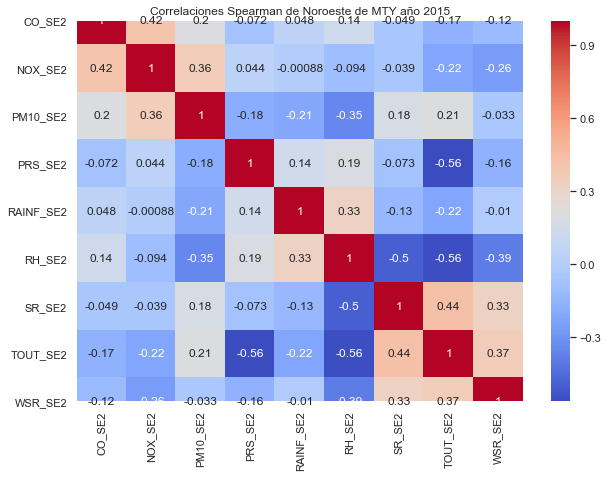

In [104]:
df_corr=df_copy.filter(like='SE2').corr(method='spearman')
fig, ax = plt.subplots(figsize=(10,7))
sns.heatmap(df_corr, annot=True, ax=ax, cmap = "coolwarm")
plt.title('Correlaciones Spearman de Noroeste de MTY año 2015')
plt.show()

In [106]:
df_copy.loc["2015-01-01 07:00:00+00:00":"2015-01-01 19:00:00+00:00"]

TypeError: '>=' not supported between instances of 'str' and 'int'

In [125]:
df_copy['hour'] = [ts.hour for ts in df_copy.index]
df_copy.groupby("hour").mean()

,PM10_SP,PRS_SP,RH_SP,SR_SP,TOUT_SP,WSR_SP,WDR_SP,PRS_NTE,RH_NTE,SR_NTE,TOUT_NTE,WSR_NTE,WDV_NTE,CO_SE,O3_SE,PM10_SE,RAINF_SE,RH_SE,SR_SE,TOUT_SE,WSR_SE,WDV_SE,CO_SE2,NOX_SE2,PM10_SE2,PRS_SE2,RAINF_SE2,RH_SE2,SR_SE2,TOUT_SE2,WSR_SE2,CO_NE,O3_NE,PM10_NE,PRS_NE,RAINF_NE,RH_NE,TOUT_NE,WSR_NE,WDV_NE,PM10_NE2,PRS_NE2,RAINF_NE2,SR_NE2,TOUT_NE2,WSR_NE2,WDV_NE2,PM10_SOE,PRS_SOE,RAINF_SOE,RH_SOE,SR_SOE,TOUT_SOE,WSR_SOE,WDV_SOE,CO_NOE,PM10_NOE,PM2.5_NOE,PRS_NOE,RAINF_NOE,RH_NOE,SO2_NOE,SR_NOE,TOUT_NOE,WSR_NOE,WDV_NOE,O3_GARCIA,PRS_GARCIA,RAINF_GARCIA,RH_GARCIA,SR_GARCIA,TOUT_GARCIA,WSR_GARCIA,CO_CENTRO,NOX_CENTRO,O3_CENTRO,PM10_CENTRO,PRS_CENTRO,RAINF_CENTRO,RH_CENTRO,SR_CENTRO,TOUT_CENTRO,WSR_CENTRO,WDV_CENTRO,hour
DATE,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2015-01-01 00:00:00+00:00,21.0,716.400000,95.0,0.0,4.37,5.6,118.0,721.000000,86.0,0.0,4.77,3.6,54.0,1.79,6.0,37.0000,0.00,97.0,0.000,4.52,6.4,180.0,1.01,12.700000,18.0,725.400000,0.01,92.0,0.0,5.95,3.5,2.50,17.0,60.0,726.100000,0.01,96.0,4.11,8.1,350.0,6.0,729.900000,0.01,0.000,4.41,10.2,7.0,66.0,706.600000,0.0,90.0,0.001,3.74,7.0,113.0,1.22,89.0,23.0,718.600000,0.0,91.0,6.1,0.0,5.52,2.1,234.0,8.0,706.000000,0.0,90.0,0.000,4.09,10.4,2.39,10.6,4.0,26.0,716.800000,0.00,97.0,0.001,4.39,4.9,52.0,0
2015-01-01 01:00:00+00:00,52.0,716.100000,95.0,0.0,4.26,5.4,110.0,720.300000,86.0,0.0,4.64,3.3,46.0,1.74,5.0,70.0000,0.00,97.0,0.000,4.30,5.1,181.0,1.01,12.700000,34.0,725.100000,0.01,91.0,0.0,5.71,2.5,2.51,10.0,139.0,725.400000,0.01,96.0,3.91,7.2,344.0,8.0,729.200000,0.01,0.000,4.20,8.9,3.0,114.0,706.000000,0.0,90.0,0.001,3.64,6.4,85.0,1.24,199.0,169.0,717.900000,0.0,91.0,5.3,0.0,5.17,3.1,247.0,8.0,705.500000,0.0,90.0,0.000,3.88,9.0,2.02,10.3,3.0,44.0,716.100000,0.01,97.0,0.001,4.23,5.3,46.0,1
2015-01-01 02:00:00+00:00,26.0,715.900000,95.0,0.0,4.20,3.9,99.0,719.900000,86.0,0.0,4.55,3.3,32.0,1.70,5.0,47.0000,0.00,97.0,0.000,4.23,4.1,190.0,1.01,12.700000,43.0,725.000000,0.01,91.0,0.0,5.55,4.1,2.41,7.0,42.0,725.000000,0.02,96.0,3.81,6.3,341.0,57.0,728.800000,0.02,0.000,4.07,8.2,360.0,58.0,705.500000,0.0,90.0,0.001,3.53,7.0,87.0,1.24,107.0,60.0,717.600000,0.0,92.0,4.2,0.0,4.93,2.2,220.0,7.0,705.000000,0.0,90.0,0.000,3.80,9.6,2.35,11.8,3.0,32.0,715.800000,0.01,97.0,0.001,4.17,4.5,65.0,2
2015-01-01 03:00:00+00:00,27.0,715.700000,95.0,0.0,4.11,4.0,91.0,719.300000,86.0,0.0,4.72,2.4,31.0,1.72,4.0,39.9059,0.00,97.0,0.000,4.14,3.5,104.0,1.01,12.700000,52.0,724.800000,0.01,91.0,0.0,5.31,2.7,2.39,7.0,23.0,724.400000,0.00,96.0,3.85,5.2,346.0,57.0,728.300000,0.00,0.000,4.14,7.0,6.0,54.0,705.000000,0.0,90.0,0.001,3.43,6.4,72.0,1.19,51.0,26.0,717.000000,0.0,92.0,3.8,0.0,4.73,2.7,255.0,7.0,704.500000,0.0,90.0,0.000,3.80,7.6,1.92,18.8,2.0,27.0,715.300000,0.01,97.0,0.001,4.24,4.5,82.0,3
2015-01-01 04:00:00+00:00,24.0,715.600000,95.0,0.0,4.01,4.0,94.0,719.000000,86.0,0.0,4.65,2.9,52.0,1.68,4.0,36.8624,0.00,97.0,0.000,4.11,2.9,103.0,1.01,12.700000,22.0,724.600000,0.00,91.0,0.0,5.35,3.0,2.37,7.0,21.0,724.100000,0.01,96.0,3.91,4.8,356.0,6.0,727.900000,0.01,0.000,4.13,7.2,350.0,45.0,704.700000,0.0,90.0,0.001,3.26,5.8,76.0,1.13,33.0,17.0,716.700000,0.0,92.0,3.8,0.0,4.73,3.7,260.0,7.0,704.200000,0.0,90.0,0.000,3.80,7.2,1.89,14.9,2.0,33.0,715.000000,0.00,97.0,0.001,4.18,3.9,77.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-12-31 19:00:00+00:00,31.0,716.200012,93.0,0.0,10.04,4.9,77.0,720.099976,84.0,0.0,10.57,2.6,81.0,0.98,7.0,25.0000,0.00,98.0,0.007,10.68,8.5,59.0,1.10,36.000000,32.0,724.900024,0.00,89.0,0.0,11.28,1.6,1.58,18.0,40.0,725.099976,0.00,94.0,10.35,6.6,2.0,57.0,728.700012,0.00,0.001,11.05,8.1,0.0,37.0,705.799988,0.0,91.0,0.001,9.51,10.1,108.0,1.56,50.0,37.0,718.0

In [127]:
df_copy.groupby("hour").mean()

,PM10_SP,PRS_SP,RH_SP,SR_SP,TOUT_SP,WSR_SP,WDR_SP,PRS_NTE,RH_NTE,SR_NTE,TOUT_NTE,WSR_NTE,WDV_NTE,CO_SE,O3_SE,PM10_SE,RAINF_SE,RH_SE,SR_SE,TOUT_SE,WSR_SE,WDV_SE,CO_SE2,NOX_SE2,PM10_SE2,PRS_SE2,RAINF_SE2,RH_SE2,SR_SE2,TOUT_SE2,WSR_SE2,CO_NE,O3_NE,PM10_NE,PRS_NE,RAINF_NE,RH_NE,TOUT_NE,WSR_NE,WDV_NE,PM10_NE2,PRS_NE2,RAINF_NE2,SR_NE2,TOUT_NE2,WSR_NE2,WDV_NE2,PM10_SOE,PRS_SOE,RAINF_SOE,RH_SOE,SR_SOE,TOUT_SOE,WSR_SOE,WDV_SOE,CO_NOE,PM10_NOE,PM2.5_NOE,PRS_NOE,RAINF_NOE,RH_NOE,SO2_NOE,SR_NOE,TOUT_NOE,WSR_NOE,WDV_NOE,O3_GARCIA,PRS_GARCIA,RAINF_GARCIA,RH_GARCIA,SR_GARCIA,TOUT_GARCIA,WSR_GARCIA,CO_CENTRO,NOX_CENTRO,O3_CENTRO,PM10_CENTRO,PRS_CENTRO,RAINF_CENTRO,RH_CENTRO,SR_CENTRO,TOUT_CENTRO,WSR_CENTRO,WDV_CENTRO
hour,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,56.739726,714.276436,69.331507,0.030792,20.527288,4.366027,134.208219,715.218903,68.400000,0.029189,21.245151,6.979452,143.643836,1.347260,16.290411,50.048315,0.003671,81.358904,0.034312,20.172137,6.590411,128.013699,1.103233,19.416986,67.367123,722.683562,0.002630,73.082192,0.021592,20.859123,6.396438,1.661918,17.021918,76.265753,719.690685,0.003014,77.021918,20.666932,6.941096,135.542466,59.200000,723.627672,0.005534,0.028786,21.203836,8.686301,153.928767,75.956164,701.494794,0.001479,70.772603,0.034058,19.783014,7.715342,155.583562,0.858959,73.356164,27.386301,713.352055,0.007041,73.189041,4.722192,0.029636,20.839069,8.588493,172.115068,17.843836,701.452604,0.000000,69.257534,0.034112,20.222849,9.201918,1.364630,18.038630,15.906849,54.926027,711.777262,0.000575,75.994521,0.018216,20.931753,5.461096,122.821918
1,52.473973,714.225477,70.761644,0.026167,20.118301,4.224658,138.227397,715.086027,70.076712,0.028414,20.810521,6.568767,136.936986,1.319288,16.189041,50.333522,0.001534,82.843836,0.035789,19.832301,6.190685,134.465753,1.047068,16.999726,62.123288,722.621645,0.001616,74.635616,0.019882,20.492164,5.972603,1.615726,16.753425,71.756164,719.571781,0.002247,78.712329,20.229123,6.519178,144.263014,54.890411,723.543563,0.003123,0.024027,20.690274,8.119726,157.616438,74.021918,701.373150,0.001068,72.000000,0.030855,19.420658,7.221918,163.849315,0.778301,73.126027,26.991781,713.245752,0.001479,74.687671,4.671781,0.029236,20.464274,7.881918,189.783562,16.950685,701.335343,0.000000,70.558904,0.031485,19.868493,8.558904,1.333973,17.113425,14.863014,56.002740,711.686028,0.000904,77.558904,0.022274,20.465562,5.171781,123.871233
2,51.690411,714.182463,72.328767,0.030189,19.755671,4.037808,142.800000,714.937260,71.246575,0.034471,20.504658,6.160274,149.008219,1.279425,15.945205,50.231098,0.002959,84.032877,0.042515,19.503644,5.830411,131.953425,1.013205,15.574521,54.361644,722.563015,0.001425,76.038356,0.019940,20.085425,5.674521,1.590603,16.575342,69.246575,719.442466,0.002795,79.991781,19.873836,6.098356,141.657534,57.156164,723.403014,0.003589,0.025682,20.268548,7.843014,155.871233,72.389041,701.262192,0.000685,73.084932,0.035838,19.124000,6.815890,170.180822,0.707288,66.200000,26.065753,713.132330,0.001178,75.936986,4.554795,0.033323,20.127616,7.243836,196.934247,16.468493,701.201644,0.000000,71.942466,0.035378,19.491507,8.040548,1.305836,16.213151,13.901370,55.030137,711.575890,0.000904,78.936986,0.028786,20.080822,4.889863,118.621918
3,51.843836,714.150409,73.298630,0.034047,19.465315,3.967671,145.589041,714.851507,72.126027,0.039718,20.244137,6.118082,138.304110,1.245507,15.728767,48.641581,0.004466,84.978082,0.046742,19.202904,5.547397,134.010959,0.997315,14.685479,52.210959,722.537536,0.003370,76.912329,0.024436,19.851973,5.550411,1.573151,16.632877,65.978082,719.336711,0.002658,80.846575,19.614301,5.927123,153.043836,52.386301,723.294521,0.003260,0.028893,19.915205,7.627671,156.843836,69.997260,701.176164,0.001315,73.983562,0.037811,18.802219,6.484110,170.169863,0.670521,62.547945,24.498630,713.054521,0.001479,76.884932,4.489863,0.035844,19.841069,7.193699,200.863014,16.120548,701.099726,0.000000,72.975342,0.039192,19.180712,7.578630,1.29

In [ ]:
df_corr=df.xs('CENTRO', level=0, axis=1).corr(method='spearman')
fig, ax = plt.subplots(figsize=(12,8))
sns.heatmap(df_corr, annot=True, ax=ax, cmap = "coolwarm")
plt.title('Correlaciones Spearman del centro de MTY año 2015')
plt.show()

In [ ]:
sns.relplot(x="height", y="weight",data=df, kind="scatter",
            col="smoker",row="sex",col_order=["NO","YES"])
plt.show()

In [ ]:
#https://seaborn.pydata.org/tutorial/color_palettes.html

In [ ]:
#WIKI
#https://es.wikipedia.org/wiki/Esmog_fotoqu%C3%ADmico

**---------------------------------**

In [ ]:
# df.loc[:,("CENTRO",["CO","NOX","O3","PM10","PRS","RAINF","RH","SR","TOUT","WSR"])]

In [ ]:
#df.filter(like="something")
#df.filter(regex="\d") filtro de columnas que contienen numero

In [ ]:
# pd.options.display.max_rows = 160

**-----------------------------------------------**